# CO Emission in- or decrease throughout Sars-Covid-19
## Introduction
Am 1. Dezember 2019 wurde der erste Sars-Covid 19 Fall registriert, ein Thema das wohl niemanden entgangen ist mit über 200 betroffenen Ländern. Am 11. März wurde COVID dann zu einer Pandemie erklärt.

Auch Österreich war unter den betroffenen Ländern mit über 5 Milionen fällen bis heute(Okt. 2022).
Für viele bedeuteten die Landeweit verordneten Lockdowns Home office, doch einige, etwa die Fabriken, konnten nur begrentzt von zu Hause aus getsuert werden. Dies hatte zu folge das einige Fabriken über den Zeitraum den Lockdowns herunterfahren mussten und vermeindliche Emissionen reduziert wurden.

Unter den vermeindlichen Emissionen befindet sich auch das CO, ein unvollständiges CO2 Gas welches bei unvollständigen Verbrennungen entstehen kann.
Grundsätzlich gilt es als toxisch und aufgrund von geruchs und geschmacksneutralität ist es auch schwer zu erkennen. DUrch seine instabile struktur verbindet sich das CO entweder schnell zu einem vollständigen CO2 oder zerfällt zu einem anderen Element.


In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib as mlp
import matplotlib.pyplot as plt
import datetime

# Covid Data of 2020 Österreich

Text(0, 0.5, 'Cases')

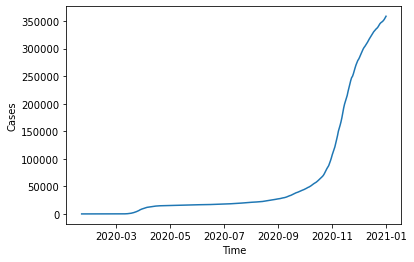

In [30]:
covid_api = "https://api.covid19api.com/"
covid_api_path = "country/austria/status/confirmed?from=2020-01-01T00:00:00Z&to=2021-01-01T00:00:00Z"
response = requests.get(covid_api + covid_api_path)
covid_data = response.text
covid_df = pd.read_json(covid_data)
plt.plot(covid_df["Date"], covid_df['Cases'])
plt.xlabel('Time')
plt.ylabel('Cases')

Anfangs, und aufgrund des frühen totalen Lockdowns in Österreich blieben die Infektionszahlen noch einigermaßen gering, doch kurz nach Schulbeginn beginnen die Zahlen wieder drastisch anzusteigen. 

(18536.0, 18627.0)

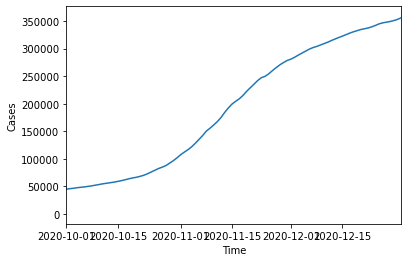

In [3]:
##fig.2 dann die lokalen extrema lesbar vl auch nur von 2020.11. an oder so
plt.plot(covid_df["Date"], covid_df['Cases'])
plt.xlabel('Time')
plt.ylabel('Cases')
plt.yticks()
ax = plt.gca()
ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2020, 12, 31)]) 

# CO Emissionen 2020 Österreich

Das Erste was auffällt ist, dass im Gegensatz zu den Covid-Infektionen der CO Graph um einiges instabiler ist.

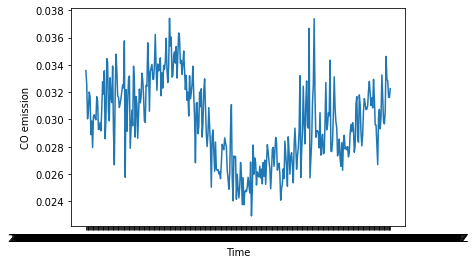

Text(0, 0.5, 'CO emission')

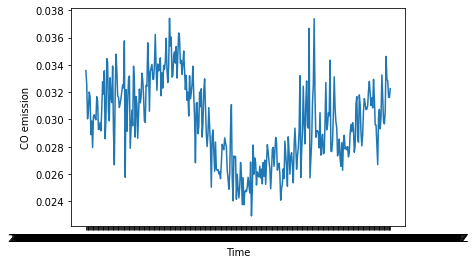

In [32]:
co_api = "https://api.v2.emissions-api.org/api/v2/carbonmonoxide/average.json?country=AT&begin=2020-01-01&end=2021-01-01"
co_api_key = ""
response = requests.get(co_api + co_api_key)
co_data = response.text
co_df = pd.read_json(co_data) # mol/m^2
plt.plot(co_df['start'], co_df['average'])
plt.xlabel('Time')
plt.ylabel('CO emission')

Der Graf während des 1. Lockdowns für CO Emissionen:

In [12]:
co_df['start'] = [value.split('T', 1)[0] for value in co_df['start']]

co_df['start'] = pd.to_datetime(co_df['start'], yearfirst = True)
#plt.plot(co_df['start'], co_df['average'])
#plt.xlabel('Time')
#plt.ylabel('CO emission')
#ax = plt.gca()
#ax.set_xlim([,]) 
co_df['start']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
360   2020-12-27
361   2020-12-28
362   2020-12-29
363   2020-12-30
364   2020-12-31
Name: start, Length: 365, dtype: datetime64[ns]

(18536.0, 18627.0)

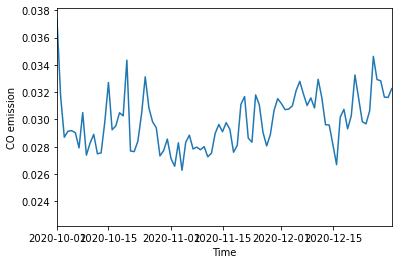

In [13]:
plt.plot(co_df['start'], co_df['average'])
plt.xlabel('Time')
plt.ylabel('CO emission')
plt.yticks()
ax = plt.gca()
ax.set_xlim([datetime.date(2020, 10, 1), datetime.date(2020, 12, 31)])

In [36]:
# covid_df["Date"].difference(co_df["start"].index)

In [37]:
# plt.plot(co_df["start"], co_df['average'], label="co")
# plt.plot(co_df["start"], covid_df['Cases'], label="covid")
# plt.xlabel('Time')

Weiters geplant sind plots für die zeiträume der Lockdowns um genauer zu sehen wie die entwicklung zu diesen zeitpunkten war
Eve auch eine gegenüberstllung der beiden grafen

# Quellen

[1] https://de.wikipedia.org/wiki/COVID-19-Pandemie_in_%C3%96sterreich